# Masterarbeit


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import bernoulli

## Mock Data

In [67]:
data=pd.read_csv("covid.csv")
sc=["Germany","France","Italy","Spain"]
sc_ger=["Germany"]
#data=data[data["countriesAndTerritories"].isin(sc_ger)]
data=data[data["continentExp"]=="Europe"]
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
157,14/06/2020,14,6,2020,48,0,Albania,AL,ALB,2866376.0,Europe
158,13/06/2020,13,6,2020,31,1,Albania,AL,ALB,2866376.0,Europe
159,12/06/2020,12,6,2020,44,1,Albania,AL,ALB,2866376.0,Europe
160,11/06/2020,11,6,2020,42,0,Albania,AL,ALB,2866376.0,Europe
161,10/06/2020,10,6,2020,36,0,Albania,AL,ALB,2866376.0,Europe
162,09/06/2020,9,6,2020,17,0,Albania,AL,ALB,2866376.0,Europe
163,08/06/2020,8,6,2020,14,0,Albania,AL,ALB,2866376.0,Europe
164,07/06/2020,7,6,2020,20,1,Albania,AL,ALB,2866376.0,Europe
165,06/06/2020,6,6,2020,15,0,Albania,AL,ALB,2866376.0,Europe
166,05/06/2020,5,6,2020,13,0,Albania,AL,ALB,2866376.0,Europe


In [56]:
data["t"]=0
temp_dic = {1: 31, 2:29,3:31,4:30,5:31,6:30}
data['t'] = data['month'].map(temp_dic)+data['day']


In [57]:
data["day"]=(range(len(data.index),0, -1))
data["cases_smooth"]=round(data["cases"].rolling(window=7).mean())
data.cases_smooth.fillna(data.cases, inplace=True)

In [58]:
data[["cases","cases_smooth"]]

,cases,cases_smooth
0,556,556.0
1,656,656.0
2,747,747.0
3,684,684.0
4,542,542.0
5,575,575.0
6,791,650.0
7,582,654.0
8,915,691.0
9,787,697.0


## Empirical distribution

In [59]:
data["p_y"]= data["cases_smooth"]/sum(data["cases_smooth"])


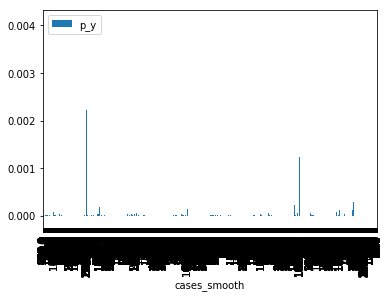

In [60]:
data.plot.bar(x="cases_smooth",y="p_y")

In [63]:
def p_y(y):
    temp_dic=dict(zip(data.cases_smooth,data.p_y))
    if y in temp_dic:
        return temp_dic(y)
    else:
        return 0 
    

In [66]:
temp_dic=dict(zip(data.cases_smooth,data.p_y))
temp_dic()

{556.0: 7.163775108484164e-05,
 656.0: 8.452223869002899e-05,
 747.0: 9.624712241074948e-05,
 684.0: 8.812989521948145e-05,
 542.0: 6.983392282011542e-05,
 575.0: 7.408580372982725e-05,
 650.0: 8.374916943371775e-05,
 654.0: 8.426454893792524e-05,
 691.0: 8.903180935184456e-05,
 697.0: 8.98048786081558e-05,
 707.0: 9.109332736867454e-05,
 738.0: 9.508751852628261e-05,
 734.0: 9.457213902207512e-05,
 718.0: 9.251062100524515e-05,
 759.0: 9.779326092337196e-05,
 717.0: 9.238177612919327e-05,
 687.0: 8.851642984763706e-05,
 668.0: 8.606837720265147e-05,
 660.0: 8.503761819423649e-05,
 647.0: 8.336263480556213e-05,
 635.0: 8.181649629293965e-05,
 623.0: 8.027035778031716e-05,
 616.0: 7.936844364795406e-05,
 597.0: 7.692039100296846e-05,
 586.0: 7.550309736639785e-05,
 560.0: 7.215313058904913e-05,
 514.0: 6.622626629066295e-05,
 402.0: 5.179564017285313e-05,
 477.0: 6.145900587674364e-05,
 417.0: 5.3728313313631236e-05,
 384.0: 4.947643240391941e-05,
 341.0: 4.393610273368885e-05,
 323.0: 